In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('ks-projects-201801.csv')
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [4]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [7]:
df.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [6]:
df['name'] = df['name'].dropna()

In [6]:
df[['category', 'main_category']].nunique()

category         159
main_category     15
dtype: int64

In [7]:
df['category'].value_counts()

Product Design       22314
Documentary          16139
Music                15727
Tabletop Games       14180
Shorts               12357
Video Games          11830
Food                 11493
Film & Video         10108
Fiction               9169
Fashion               8554
Nonfiction            8318
Art                   8253
Apparel               7166
Theater               7057
Technology            6930
Rock                  6758
Children's Books      6756
Apps                  6345
Publishing            6018
Webseries             5762
Photography           5752
Indie Rock            5657
Narrative Film        5188
Web                   5153
Comics                4996
Crafts                4664
Country & Folk        4451
Design                4199
Hip-Hop               3912
Hardware              3663
                     ...  
Couture                275
Blues                  268
Animals                255
Fabrication Tools      250
Printing               238
Makerspaces            238
M

In [8]:
success_rate = round(df['state'].value_counts() / len(df['state']) * 100, 2)
success_rate

failed        52.22
successful    35.38
canceled      10.24
undefined      0.94
live           0.74
suspended      0.49
Name: state, dtype: float64

In [9]:
print('before: ', df.shape)
df = df[(df['state'] == 'failed') | (df['state'] == 'successful')]
df['state'] = df['state'].map({
    'failed': 0,
    'successful': 1         
})
print('after: ', df.shape)

before:  (378661, 15)
after:  (331675, 15)


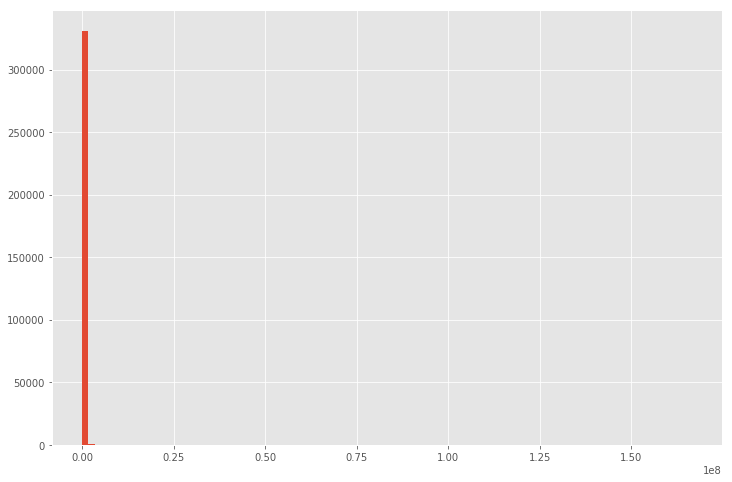

In [10]:
plt.figure(figsize=(12, 8))
plt.hist(df['usd_goal_real'], bins=100)
plt.show()

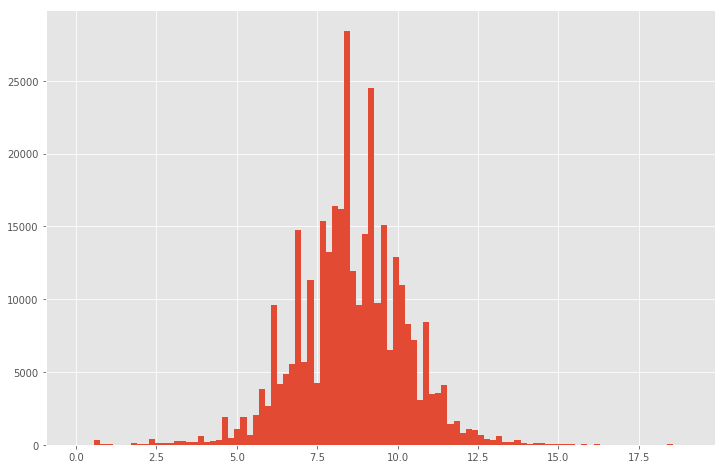

In [11]:
df['usd_goal_real'] = np.log1p(df['usd_goal_real'])

plt.figure(figsize=(12, 8))
plt.hist(df['usd_goal_real'], bins=100)
plt.show()

In [12]:
df['deadline'] = pd.to_datetime(df['deadline'], format='%Y-%m-%d %H:%M:%S')
df['launched'] = pd.to_datetime(df['launched'], format='%Y-%m-%d %H:%M:%S')
df['duration']=(df['deadline'] - df['launched']).dt.days

df['quarter']= df['launched'].dt.quarter
df['month']= df['launched'].dt.month
df['year']= df['launched'].dt.year
df['dayofweek']= df['launched'].dt.dayofweek

df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration,quarter,month,year,dayofweek
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.0,0.0,7.336253,58,3,8,2015,1
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,100.0,2421.0,10.308986,59,3,9,2017,5
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,220.0,10.714440,44,1,1,2013,5
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,1.0,8.517393,29,1,3,2012,5
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,1,224,US,52375.0,52375.0,10.819798,34,1,2,2016,4


In [13]:
df = df.drop(columns=['ID', 'deadline', 'goal', 'launched', 'pledged', 'backers', 'usd pledged', 'usd_pledged_real'])
df.head()

,name,category,main_category,currency,state,country,usd_goal_real,duration,quarter,month,year,dayofweek
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,0,GB,7.336253,58,3,8,2015,1
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,0,US,10.308986,59,3,9,2017,5
2,Where is Hank?,Narrative Film,Film & Video,USD,0,US,10.714440,44,1,1,2013,5
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,0,US,8.517393,29,1,3,2012,5
5,Monarch Espresso Bar,Restaurants,Food,USD,1,US,10.819798,34,1,2,2016,4


In [14]:
df['name_len'] = df['name'].str.len()
df['name_words'] = df['name'].apply(lambda x: len(str(x).split(' ')))
df.drop(columns=['name'], inplace=True)

In [15]:
df.isnull().sum()

category         0
main_category    0
currency         0
state            0
country          0
usd_goal_real    0
duration         0
quarter          0
month            0
year             0
dayofweek        0
name_len         3
name_words       0
dtype: int64

In [16]:
df['name_len'] = df['name_len'].fillna(0)

In [17]:
df = pd.get_dummies(df , ['category', 'main_category', 'currency', 'country'])
df.columns

Index(['state', 'usd_goal_real', 'duration', 'quarter', 'month', 'year',
       'dayofweek', 'name_len', 'name_words', 'category_3D Printing',
       ...
       'country_JP', 'country_LU', 'country_MX', 'country_N,0"', 'country_NL',
       'country_NO', 'country_NZ', 'country_SE', 'country_SG', 'country_US'],
      dtype='object', length=220)

In [18]:
df.head()

,state,usd_goal_real,duration,quarter,month,year,dayofweek,name_len,name_words,category_3D Printing,...,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,0,7.336253,58,3,8,2015,1,31.0,6,0,...,0,0,0,0,0,0,0,0,0,0
1,0,10.308986,59,3,9,2017,5,45.0,8,0,...,0,0,0,0,0,0,0,0,0,1
2,0,10.714440,44,1,1,2013,5,14.0,3,0,...,0,0,0,0,0,0,0,0,0,1
3,0,8.517393,29,1,3,2012,5,49.0,7,0,...,0,0,0,0,0,0,0,0,0,1
5,1,10.819798,34,1,2,2016,4,20.0,3,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [20]:
X = df.drop(columns=['state'])
y = df['state']

print(X.shape)
print(y.shape)

(331675, 219)
(331675,)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(265340, 219) (265340,)
(66335, 219) (66335,)


In [24]:
params = {
    'silent': 1,
    'max_depth': 6,
    'min_child_weight': 1,
    'eta': 0.1,
    'tree_method': 'gpu_exact',
    'objective': 'gpu:binary:logistic',
    'eval_metric': 'logloss',
    'predictor': 'gpu_predictor'
}

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
model = xgb.train(params=params,
                  dtrain=dtrain, 
                  num_boost_round=1000,
                  early_stopping_rounds=5, 
                  evals=[(dtest, 'test')])

[0]	test-logloss:0.679754
Will train until test-logloss hasn't improved in 5 rounds.
[1]	test-logloss:0.668725
[2]	test-logloss:0.659427
[3]	test-logloss:0.651626
[4]	test-logloss:0.64483
[5]	test-logloss:0.639184
[6]	test-logloss:0.634047
[7]	test-logloss:0.62971
[8]	test-logloss:0.625632
[9]	test-logloss:0.621971
[10]	test-logloss:0.618512
[11]	test-logloss:0.615713
[12]	test-logloss:0.612866
[13]	test-logloss:0.610768
[14]	test-logloss:0.608569
[15]	test-logloss:0.606297
[16]	test-logloss:0.604507
[17]	test-logloss:0.602783
[18]	test-logloss:0.601382
[19]	test-logloss:0.599976
[20]	test-logloss:0.598382
[21]	test-logloss:0.597168
[22]	test-logloss:0.596207
[23]	test-logloss:0.595293
[24]	test-logloss:0.594255
[25]	test-logloss:0.59345
[26]	test-logloss:0.592541
[27]	test-logloss:0.591693
[28]	test-logloss:0.590895
[29]	test-logloss:0.589985
[30]	test-logloss:0.589361
[31]	test-logloss:0.588676
[32]	test-logloss:0.587926
[33]	test-logloss:0.58725
[34]	test-logloss:0.586774
[35]	test-

[296]	test-logloss:0.563961
[297]	test-logloss:0.56389
[298]	test-logloss:0.563869
[299]	test-logloss:0.563855
[300]	test-logloss:0.563858
[301]	test-logloss:0.563848
[302]	test-logloss:0.563829
[303]	test-logloss:0.563834
[304]	test-logloss:0.563823
[305]	test-logloss:0.563805
[306]	test-logloss:0.56381
[307]	test-logloss:0.563803
[308]	test-logloss:0.56381
[309]	test-logloss:0.563812
[310]	test-logloss:0.563808
[311]	test-logloss:0.56379
[312]	test-logloss:0.563773
[313]	test-logloss:0.563763
[314]	test-logloss:0.563739
[315]	test-logloss:0.563727
[316]	test-logloss:0.56364
[317]	test-logloss:0.563637
[318]	test-logloss:0.563624
[319]	test-logloss:0.563596
[320]	test-logloss:0.563584
[321]	test-logloss:0.563589
[322]	test-logloss:0.563588
[323]	test-logloss:0.563584
[324]	test-logloss:0.563556
[325]	test-logloss:0.563564
[326]	test-logloss:0.563514
[327]	test-logloss:0.563525
[328]	test-logloss:0.563517
[329]	test-logloss:0.563501
[330]	test-logloss:0.56349
[331]	test-logloss:0.56348

In [25]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(xgb.DMatrix(X_test), ntree_limit=model.best_ntree_limit)
prediction = [round(pred) for pred in y_pred]

acc = accuracy_score(y_test, prediction)
print(round(acc * 100, 2))

69.76


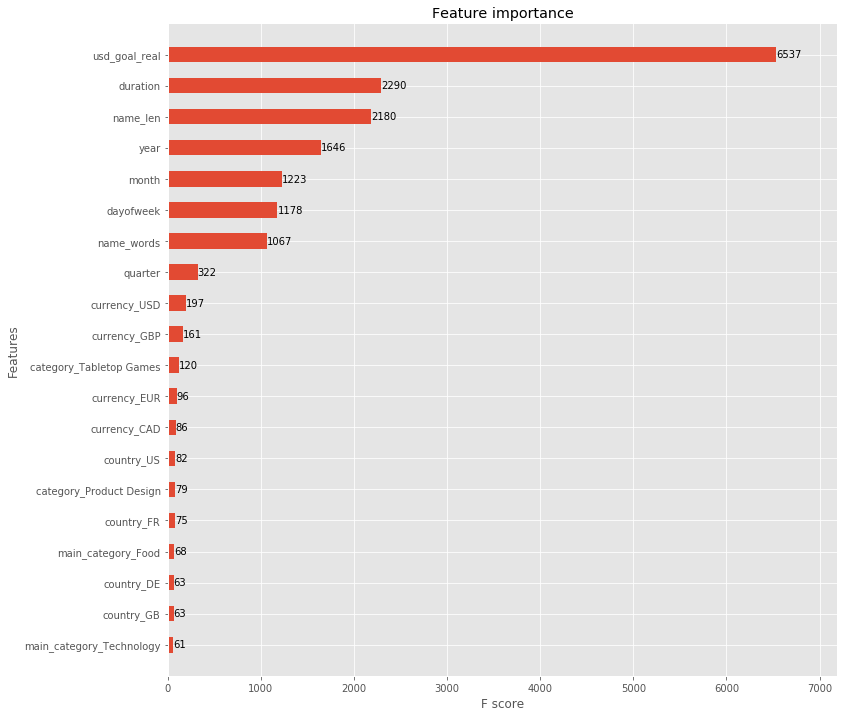

In [26]:
fig, ax = plt.subplots(figsize=(12,12))
xgb.plot_importance(model, max_num_features=20, height=0.5, ax=ax)
plt.show()

In [27]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, \
                             AdaBoostClassifier, GradientBoostingClassifier

In [28]:
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def fit(self, x, y):
        return self.clf.fit(x, y)

    def predict(self, x):
        return self.clf.predict(x) 
    
    def predict_proba(self, x):
        return self.clf.predict_proba(x)

In [29]:
rfc_params = {
    'n_jobs': -1,
    'n_estimators': 500,
    'warm_start': True, 
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 1
}

etc_params = {
    'n_jobs': -1,
    'n_estimators':500,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 1
}

ada_params = {
    'n_estimators': 500,
    'learning_rate' : 0.75
}

gbc_params = {
    'n_estimators': 500,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 1
}

In [25]:
# SEED = 0

# rfc = SklearnHelper(clf=RandomForestClassifier, seed=SEED, params=rfc_params).fit(X_train, y_train)
# etc = SklearnHelper(clf=ExtraTreesClassifier, seed=SEED, params=etc_params).fit(X_train, y_train)
# ada = SklearnHelper(clf=AdaBoostClassifier, seed=SEED, params=ada_params).fit(X_train, y_train)
# gbc = SklearnHelper(clf=GradientBoostingClassifier, seed=SEED, params=gbc_params).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   21.1s finished
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   28.7s finished


      Iter       Train Loss   Remaining Time 
         1           1.3311           28.19m
         2           1.3160           29.13m
         3           1.3029           28.78m
         4           1.2917           28.22m
         5           1.2813           27.94m
         6           1.2728           27.94m
         7           1.2650           27.70m
         8           1.2580           27.75m
         9           1.2521           27.47m
        10           1.2461           27.80m
        20           1.2088           24.54m
        30           1.1883           21.54m
        40           1.1749           19.96m
        50           1.1663           18.04m
        60           1.1591           16.88m
        70           1.1538           15.83m
        80           1.1496           14.78m
        90           1.1461           13.83m
       100           1.1421           13.16m
       200           1.1227            8.08m
       300           1.1118            4.89m
       40

In [26]:
# rfc_pred = rfc.predict_proba(X_train)
# etc_pred = etc.predict_proba(X_train)
# ada_pred = ada.predict_proba(X_train)
# gbc_pred = gbc.predict_proba(X_train)

[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    1.6s finished


In [32]:
# preds_train = pd.DataFrame({'rfc_pred': rfc_pred[:, 1],
#                             'etc_pred': etc_pred[:, 1],
#                             'ada_pred': ada_pred[:, 1],
#                             'gbc_pred': gbc_pred[:, 1]})

preds_train_array = np.load('preds_train.npy')
preds_train = pd.DataFrame(preds_train_array, columns=['rfc_pred', 'etc_pred', 'ada_pred', 'gbc_pred'])
preds_train.head()

,rfc_pred,etc_pred,ada_pred,gbc_pred
0,0.509308,0.540601,0.500736,0.779683
1,0.410226,0.405980,0.499536,0.326807
2,0.294653,0.356279,0.498241,0.044276
3,0.456229,0.457445,0.500262,0.612225
4,0.304202,0.303696,0.498580,0.132501


In [34]:
# rfc_pred_test = rfc.predict_proba(X_test)
# etc_pred_test = etc.predict_proba(X_test)
# ada_pred_test = ada.predict_proba(X_test)
# gbc_pred_test = gbc.predict_proba(X_test)

# preds_test = pd.DataFrame({'rfc_pred': rfc_pred_test[:, 1],
#                            'etc_pred': etc_pred_test[:, 1],
#                            'ada_pred': ada_pred_test[:, 1],
#                            'gbc_pred': gbc_pred_test[:, 1]})

preds_test_array = np.load('preds_test.npy')
preds_test = pd.DataFrame(preds_test_array, columns=['rfc_pred', 'etc_pred', 'ada_pred', 'gbc_pred'])
preds_test.head()

,rfc_pred,etc_pred,ada_pred,gbc_pred
0,0.411190,0.401231,0.500416,0.620315
1,0.428314,0.408487,0.499715,0.412509
2,0.442547,0.462975,0.500071,0.437666
3,0.414085,0.398738,0.500051,0.544812
4,0.402922,0.390018,0.499890,0.385651


In [35]:
params = {
    'silent': 1,
    'max_depth': 2,
    'min_child_weight': 1,
    'eta': 0.1,
    'tree_method': 'gpu_exact',
    'objective': 'gpu:binary:logistic',
    'eval_metric': 'logloss',
    'predictor': 'gpu_predictor'
}

dtrain = xgb.DMatrix(preds_train, label=y_train)
dtest = xgb.DMatrix(preds_test, label=y_test)
model = xgb.train(params=params,
                  dtrain=dtrain, 
                  num_boost_round=1000,
                  early_stopping_rounds=5, 
                  evals=[(dtest, 'test')])

[0]	test-logloss:0.671644
Will train until test-logloss hasn't improved in 5 rounds.
[1]	test-logloss:0.654245
[2]	test-logloss:0.639923
[3]	test-logloss:0.627849
[4]	test-logloss:0.617878
[5]	test-logloss:0.609495
[6]	test-logloss:0.602404
[7]	test-logloss:0.596498
[8]	test-logloss:0.59154
[9]	test-logloss:0.587285
[10]	test-logloss:0.58366
[11]	test-logloss:0.580653
[12]	test-logloss:0.578083
[13]	test-logloss:0.575907
[14]	test-logloss:0.573981
[15]	test-logloss:0.572389
[16]	test-logloss:0.571103
[17]	test-logloss:0.569998
[18]	test-logloss:0.569003
[19]	test-logloss:0.568159
[20]	test-logloss:0.567461
[21]	test-logloss:0.566844
[22]	test-logloss:0.566362
[23]	test-logloss:0.565907
[24]	test-logloss:0.5655
[25]	test-logloss:0.565208
[26]	test-logloss:0.564917
[27]	test-logloss:0.564689
[28]	test-logloss:0.56449
[29]	test-logloss:0.564302
[30]	test-logloss:0.564194
[31]	test-logloss:0.564025
[32]	test-logloss:0.563961
[33]	test-logloss:0.563926
[34]	test-logloss:0.563823
[35]	test-l

In [36]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(xgb.DMatrix(preds_test), ntree_limit=model.best_ntree_limit)
prediction = [round(pred) for pred in y_pred]

acc = accuracy_score(y_test, prediction)
print(round(acc * 100, 2))

69.81
